<img src="http://hilpisch.com/tpq_logo.png" width="350px" align="right">

# Simple Neural Networks in Python

&copy; Dr. Yves J. Hilpisch

The Python Quants GmbH

In [1]:
import numpy as np
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

## Neural Network for Regression

[Regression & Neural Networks](https://www.cs.cmu.edu/afs/cs.cmu.edu/academic/class/15381-s06/www/nn.pdf)

### Linear OLS Regression

In [2]:
x = np.linspace(0, 10, 5)
y = 3 * x + 2.5 + np.random.standard_normal(len(x)) * 5

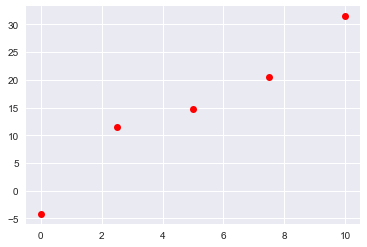

In [3]:
plt.plot(x, y, 'ro');

In [4]:
reg = np.polyfit(x, y, deg=1)

In [5]:
reg

array([ 3.20791083, -1.23705534])

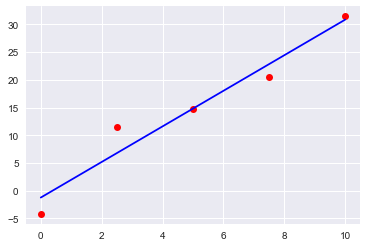

In [6]:
yr = np.polyval(reg, x)
plt.plot(x, y, 'ro')
plt.plot(x, yr, 'b');

In [7]:
((y - yr) ** 2).mean()

7.4876045521534866

### Network Training &mdash; Single Step

In [8]:
l0 = np.array((x, len(x) * [1])).T

In [9]:
l0

array([[  0. ,   1. ],
       [  2.5,   1. ],
       [  5. ,   1. ],
       [  7.5,   1. ],
       [ 10. ,   1. ]])

In [10]:
weights = np.array(((2., 2.)))

In [11]:
l1 = np.dot(l0, weights)
l1

array([  2.,   7.,  12.,  17.,  22.])

In [12]:
y

array([ -4.18804341,  11.55584317,  14.7240732 ,  20.46371507,  31.45690599])

In [13]:
d = y - l1
d

array([-6.18804341,  4.55584317,  2.7240732 ,  3.46371507,  9.45690599])

In [14]:
(d ** 2).mean()  # MSE

33.579711209646916

In [15]:
alpha = 0.01  # learning rate

In [16]:
update = alpha * np.dot(d, l0)
update

array([ 1.45556897,  0.14012494])

In [17]:
weights += update  # updating weights

In [18]:
weights

array([ 3.45556897,  2.14012494])

In [19]:
l1 = np.dot(l0, weights)
d = y - l1
(d ** 2).mean()  # new MSE

29.556858845812496

### Network Training &mdash; Multi Step

In [20]:
weights = np.array(((1., 100.)))

In [21]:
# repeat a few times
for _ in range(51):
    # layer 1
    l1 = np.dot(l0, weights)

    # deltas of layer 1
    d = y - l1
    
    # print MSE
    if _ % 5 == 0:
        print('MSE after %4d iterations: %6.2f' % (_, (d ** 2).mean()))

    # update weights based on deltas
    weights += alpha * np.dot(d, l0)

MSE after    0 iterations: 8204.01
MSE after    5 iterations: 4690.87
MSE after   10 iterations: 3109.04
MSE after   15 iterations: 2303.67
MSE after   20 iterations: 1826.36
MSE after   25 iterations: 1500.52
MSE after   30 iterations: 1254.50
MSE after   35 iterations: 1057.51
MSE after   40 iterations: 894.95
MSE after   45 iterations: 758.84
MSE after   50 iterations: 644.09


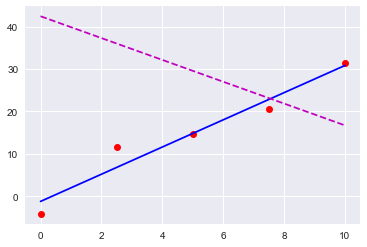

In [22]:
yr = np.polyval(reg, x)
plt.plot(x, y, 'ro')
plt.plot(x, yr, 'b')
plt.plot(x, l1, 'm--');

## Neural Network for Classification

https://iamtrask.github.io/2015/07/12/basic-python-network/

### Sigmoid Function

https://en.wikipedia.org/wiki/Sigmoid_function

In [23]:
# sigmoid function
def sigmoid(x, deriv=False):
    if deriv == True:
        return sigmoid(x) * (1 - sigmoid(x))
    return 1 / (1 + np.exp(-x))

In [24]:
x = np.linspace(-10, 10, 250)
y = sigmoid(x)
d = sigmoid(x, deriv=True)

In [25]:
s = np.where(x > 0, 1, 0)

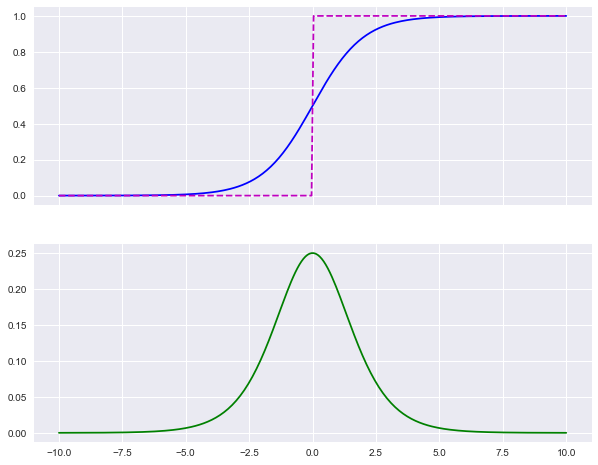

In [26]:
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 8))
ax[0].plot(x, y, 'b')
ax[0].plot(x, s, 'm--')

ax[1].plot(x, d, 'g');

### The Data

In [27]:
# input dataset (features)
# layer 0
l0 = np.array([[0, 0, 1],
               [0, 1, 1],
               [1, 0, 1],
               [1, 1, 1] ])

In [28]:
# output dataset (labels)          
y = np.array([[0,
               0,
               1,
               1]]).T

### Single Step

In [29]:
# initialize weights randomly with mean 0
np.random.seed(1)
weights = 2 * np.random.random((3, 1)) - 1
weights

array([[-0.16595599],
       [ 0.44064899],
       [-0.99977125]])

In [30]:
np.dot(l0, weights)

array([[-0.99977125],
       [-0.55912226],
       [-1.16572724],
       [-0.72507825]])

In [31]:
l1 = sigmoid(np.dot(l0, weights))
l1

array([[ 0.2689864 ],
       [ 0.36375058],
       [ 0.23762817],
       [ 0.3262757 ]])

In [32]:
e = y - l1
e

array([[-0.2689864 ],
       [-0.36375058],
       [ 0.76237183],
       [ 0.6737243 ]])

In [33]:
(e ** 2).mean()

0.30994584990928159

In [34]:
sigmoid(l1, True)

array([[ 0.24553187],
       [ 0.24190935],
       [ 0.24650375],
       [ 0.24346281]])

In [35]:
d = e * sigmoid(l1, True)
d

array([[-0.06604473],
       [-0.08799467],
       [ 0.18792752],
       [ 0.16402681]])

In [36]:
u = np.dot(l0.T, d)
u

array([[ 0.35195432],
       [ 0.07603214],
       [ 0.19791493]])

In [37]:
weights += u
weights

array([[ 0.18599833],
       [ 0.51668113],
       [-0.80185633]])

In [38]:
l1 = sigmoid(np.dot(l0, weights))
e = y - l1
(e ** 2).mean()

0.24425422705654065

In [39]:
l1

array([[ 0.30962857],
       [ 0.42918547],
       [ 0.35072407],
       [ 0.47522609]])

### Multiple Steps

In [40]:
# initialize weights randomly with mean 0
np.random.seed(1)
weights = 2 * np.random.random((3, 1)) - 1
weights

array([[-0.16595599],
       [ 0.44064899],
       [-0.99977125]])

In [41]:
for _ in range(201):
    # forward propagation
    # layer 1
    l1 = sigmoid(np.dot(l0, weights))

    # errors of layer 1
    e = y - l1
    if _ % 200 == 0:
        print('\nafter %d iterations' % _)
        print('layer 1:', l1.T)
        print('errors: ', e.T)
        print('MSE:    ', (e ** 2).mean())

    # multiply errors by the slope of the 
    # sigmoid at the values in l1
    d = e * sigmoid(l1, True)

    # update weights
    weights += np.dot(l0.T, d)


after 0 iterations
layer 1: [[ 0.2689864   0.36375058  0.23762817  0.3262757 ]]
errors:  [[-0.2689864  -0.36375058  0.76237183  0.6737243 ]]
MSE:     0.309945849909

after 200 iterations
layer 1: [[ 0.03581881  0.02486184  0.97910131  0.96983694]]
errors:  [[-0.03581881 -0.02486184  0.02089869  0.03016306]]
MSE:     0.000811915861218


<img src="http://hilpisch.com/tpq_logo.png" width="350px" align="right">